In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/coaster_db.csv')

In [5]:
df.shape

(1087, 56)

In [6]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [8]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [9]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [11]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [17]:
df = df[['coaster_name','Location', 'Status','speed_mph','height_ft',
       'Inversions_clean', 'Gforce_clean', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean','Manufacturer','year_introduced']].copy()

In [18]:
df

,coaster_name,Location,Status,speed_mph,height_ft,Inversions_clean,Gforce_clean,latitude,longitude,Type_Main,opening_date_clean,Manufacturer,year_introduced
0,Switchback Railway,Coney Island,Removed,6.0,NaN,0,2.9,40.5740,-73.9780,Wood,1884-06-16,LaMarcus Adna Thompson,1884
1,Flip Flap Railway,Sea Lion Park,Removed,NaN,NaN,1,12.0,40.5780,-73.9790,Wood,1895-01-01,Lina Beecher,1895
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,NaN,0,NaN,41.5800,-81.5700,Other,NaN,NaN,1896
3,Loop the Loop (Coney Island),Other,Removed,NaN,NaN,1,NaN,40.5745,-73.9780,Steel,1901-01-01,Edwin Prescott,1901
4,Loop the Loop (Young's Pier),Other,Removed,NaN,NaN,1,NaN,39.3538,-74.4342,Steel,1901-01-01,Edwin Prescott,1901
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,53.0,NaN,3,4.7,NaN,NaN,Steel,NaN,Anton Schwarzkopf,2022
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,73.0,NaN,2,NaN,37.2339,-76.6426,Steel,2022-01-01,Intamin,2022
1084,Tron Lightcycle Power Run,Other,NaN,59.3,NaN,0,4.0,NaN,NaN,Steel,2016-06-16,Vekoma,2022
1085,Tumbili,Kings Dominion,Under construction,34.0,NaN,0,NaN,NaN,NaN,Steel,NaN,S&S – Sansei Technologies,2022


In [20]:
df.shape

(1087, 13)

In [22]:
df.dtypes

coaster_name           object
Location               object
Status                 object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
Manufacturer           object
year_introduced         int64
dtype: object

In [23]:
df['opening_date_clean']=pd.to_datetime(df['opening_date_clean'])

In [26]:
df['year_introduced']=pd.to_numeric(df['year_introduced'])

0       1884
1       1895
2       1896
3       1901
4       1901
        ... 
1082    2022
1083    2022
1084    2022
1085    2022
1086    2022
Name: year_introduced, Length: 1087, dtype: int64

In [28]:
df.isna().sum()

coaster_name            0
Location                0
Status                213
speed_mph             150
height_ft             916
Inversions_clean        0
Gforce_clean          725
latitude              275
longitude             275
Type_Main               0
opening_date_clean    250
Manufacturer           59
year_introduced         0
dtype: int64

In [30]:
df.loc[df.duplicated()]#no duplicate values in the dataset

,coaster_name,Location,Status,speed_mph,height_ft,Inversions_clean,Gforce_clean,latitude,longitude,Type_Main,opening_date_clean,Manufacturer,year_introduced


In [34]:
df.loc[~df.duplicated(subset=['coaster_name','Location' ,'opening_date_clean'  ])].reset_index(drop=True).copy()

,coaster_name,Location,Status,speed_mph,height_ft,Inversions_clean,Gforce_clean,latitude,longitude,Type_Main,opening_date_clean,Manufacturer,year_introduced
0,Switchback Railway,Coney Island,Removed,6.0,NaN,0,2.9,40.5740,-73.9780,Wood,1884-06-16,LaMarcus Adna Thompson,1884
1,Flip Flap Railway,Sea Lion Park,Removed,NaN,NaN,1,12.0,40.5780,-73.9790,Wood,1895-01-01,Lina Beecher,1895
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,NaN,0,NaN,41.5800,-81.5700,Other,NaT,NaN,1896
3,Loop the Loop (Coney Island),Other,Removed,NaN,NaN,1,NaN,40.5745,-73.9780,Steel,1901-01-01,Edwin Prescott,1901
4,Loop the Loop (Young's Pier),Other,Removed,NaN,NaN,1,NaN,39.3538,-74.4342,Steel,1901-01-01,Edwin Prescott,1901
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,52.0,NaN,0,NaN,28.4088,-81.4633,Steel,2022-02-01,Premier Rides,2022
986,Leviathan (Sea World),Sea World,Under construction,49.7,105.0,0,NaN,-27.9574,153.4263,Wood,2022-01-01,Martin & Vleminckx,2022
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,73.0,NaN,2,NaN,37.2339,-76.6426,Steel,2022-01-01,Intamin,2022
988,Tumbili,Kings Dominion,Under construction,34.0,NaN,0,NaN,NaN,NaN,Steel,NaT,S&S – Sansei Technologies,2022


<Axes: title={'center': 'Top years Coasters introduced'}>

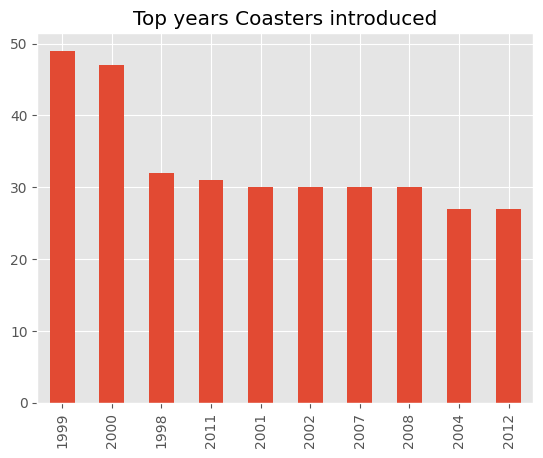

In [37]:
ax = df['year_introduced'].value_counts().head(10).plot(kind='bar', title='Top years Coasters introduced')
ax.se


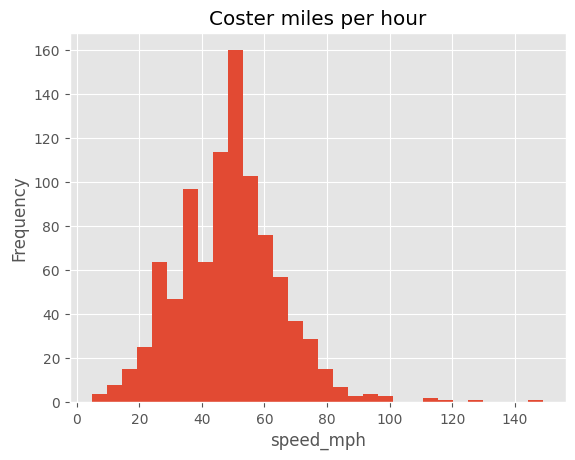

In [50]:
ax1 = df['speed_mph'].plot(kind = 'hist',bins = 30,title = 'Coster miles per hour')
ax1.set_xlabel('speed_mph')
plt.show()

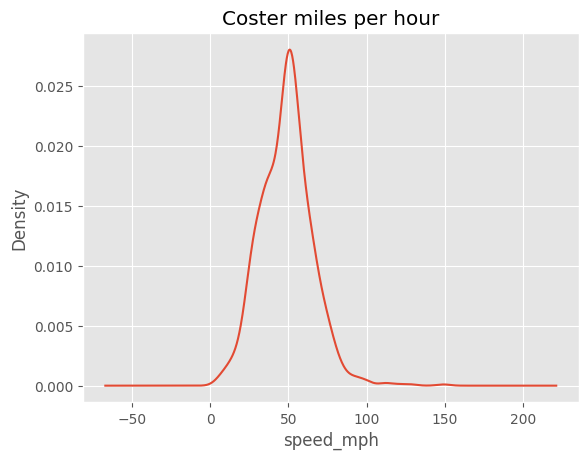

In [49]:
ax1 = df['speed_mph'].plot(kind = 'kde',title = 'Coster miles per hour')
ax1.set_xlabel('speed_mph')# density plot
plt.show()

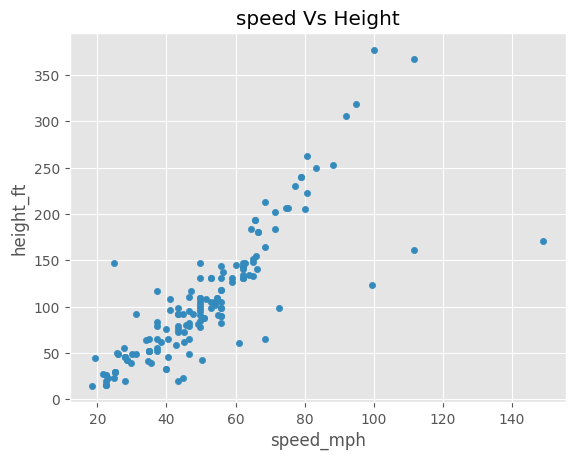

In [48]:
# feature relationsips
df.plot(kind = "scatter",x = 'speed_mph',y = 'height_ft',title = 'speed Vs Height')
plt.show()

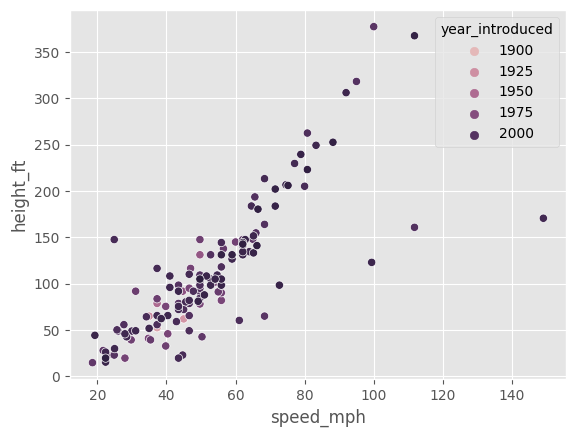

In [53]:
sns.scatterplot(x = 'speed_mph',y = 'height_ft',hue = 'year_introduced',data = df,)
plt.show()

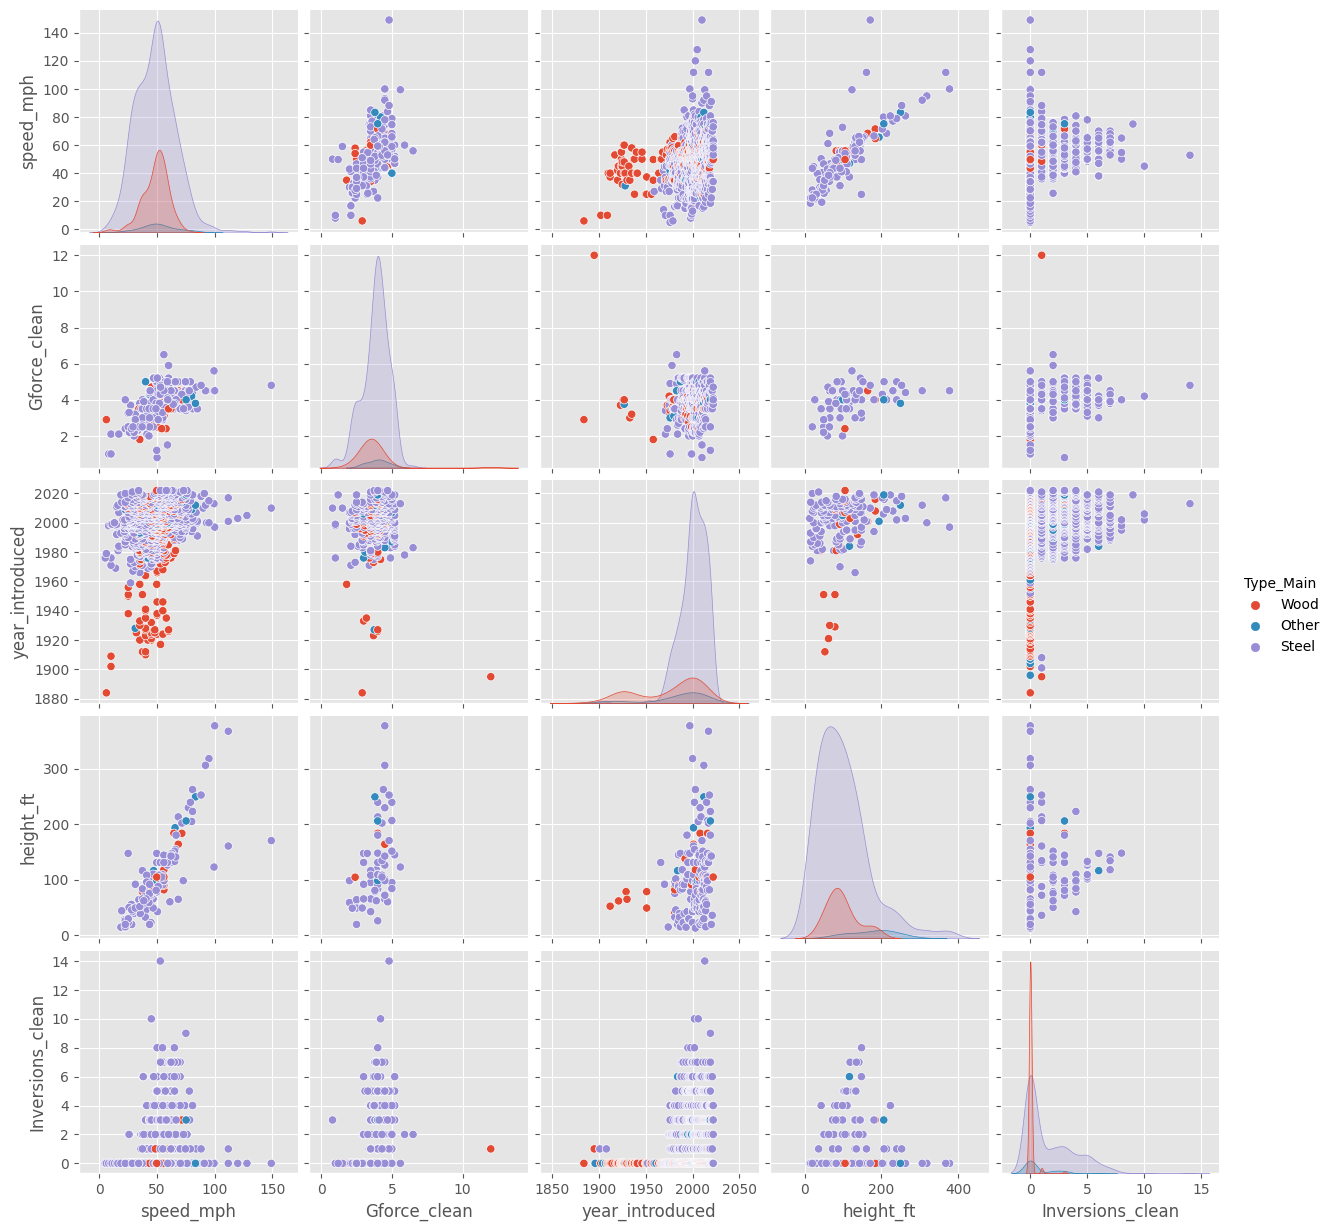

In [55]:
sns.pairplot(df,vars = ['speed_mph','Gforce_clean','year_introduced','height_ft','Inversions_clean'],hue = 'Type_Main')
plt.show()

In [57]:
corr_matrix = df.dropna().corr()

<ipython-input-57-7dbb44907505>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.dropna().corr()


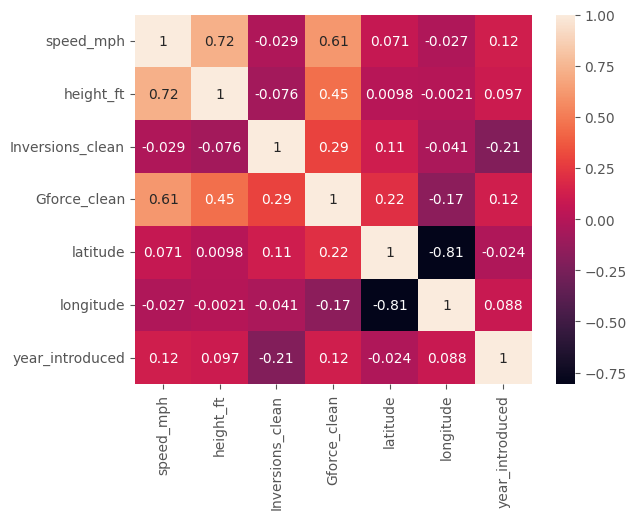

In [62]:
sns.heatmap(corr_matrix,annot = True)
plt.show()

In [63]:
df.head()

,coaster_name,Location,Status,speed_mph,height_ft,Inversions_clean,Gforce_clean,latitude,longitude,Type_Main,opening_date_clean,Manufacturer,year_introduced
0,Switchback Railway,Coney Island,Removed,6.0,NaN,0,2.9,40.5740,-73.9780,Wood,1884-06-16,LaMarcus Adna Thompson,1884
1,Flip Flap Railway,Sea Lion Park,Removed,NaN,NaN,1,12.0,40.5780,-73.9790,Wood,1895-01-01,Lina Beecher,1895
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,NaN,0,NaN,41.5800,-81.5700,Other,NaT,NaN,1896
3,Loop the Loop (Coney Island),Other,Removed,NaN,NaN,1,NaN,40.5745,-73.9780,Steel,1901-01-01,Edwin Prescott,1901
4,Loop the Loop (Young's Pier),Other,Removed,NaN,NaN,1,NaN,39.3538,-74.4342,Steel,1901-01-01,Edwin Prescott,1901


Text(0.5, 0, 'Average coaster speed')

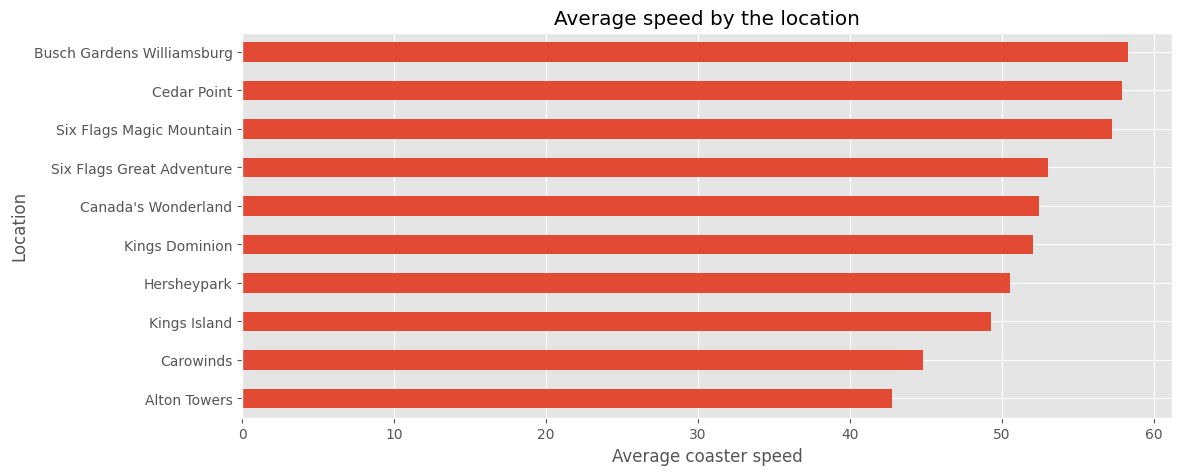

In [75]:
ax3 = df.query('Location != "Other"').groupby('Location')['speed_mph'].agg(['mean','count']).query('count>=10').sort_values('mean')['mean'].plot(kind = 'barh',figsize = (12,5),title = "Average speed by the location")
ax3.set_xlabel('Average coaster speed')

In [83]:
df['Manufacturer'].value_counts()

Vekoma                              135
Bolliger & Mabillard                119
Intamin                              99
Mack Rides                           62
Arrow Dynamics                       54
                                   ... 
BHS                                   1
British Rail Engineering Limited      1
Bailey Rides, Inc.                    1
Preston & Barbieri                    1
Gravitykraft Corporation              1
Name: Manufacturer, Length: 102, dtype: int64

In [91]:
df.dropna().groupby('Manufacturer')['speed_mph','height_ft'].agg('mean')

<ipython-input-91-bf4ec062e619>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.dropna().groupby('Manufacturer')['speed_mph','height_ft'].agg('mean')


,speed_mph,height_ft
Manufacturer,,
Anton Schwarzkopf,60.000000,145.000000
Bolliger & Mabillard,65.276923,154.153846
Chance Morgan,30.000000,48.900000
Gerstlauer,48.030000,109.630000
Hebei Zhongye Metallurgical Equipment,45.050000,94.450000
Intamin,75.287500,162.775000
Kumbak,42.900000,59.100000
Mack Rides,51.750000,116.266667
Maurer AG,65.200000,151.600000


In [92]:
top_manufacturer = df['Manufacturer'].value_counts().idxmax()
print(f"The manufacturer producing the highest number of coasters is: {top_manufacturer}")


The manufacturer producing the highest number of coasters is: Vekoma


In [93]:
manufacturer_data = df[df['Manufacturer'] == top_manufacturer]
avg_speed = manufacturer_data['speed_mph'].mean()
avg_height = manufacturer_data['height_ft'].mean()

print(f"The average speed of coasters from {top_manufacturer} is: {avg_speed} mph")
print(f"The average height of coasters from {top_manufacturer} is: {avg_height} ft")


The average speed of coasters from Vekoma is: 43.3046875 mph
The average height of coasters from Vekoma is: 82.3103448275862 ft


In [94]:
location_avg_speed = df.groupby('Location')['speed_mph'].mean().idxmax()
print(f"The location with the highest average coaster speed is: {location_avg_speed}")


The location with the highest average coaster speed is: Ferrari World Abu Dhabi


In [95]:
removed_locations = df[df['Status'] == 'Removed']['Location'].value_counts()
print("Locations with a significant number of removed coasters:")
print(removed_locations)


Locations with a significant number of removed coasters:
Other                        11
Coney Island                  6
Six Flags Great Adventure     6
Kings Island                  5
Revere Beach                  4
                             ..
Tolchester Beach Park         1
Crystal Beach                 1
Canobie Lake Park             1
Six Flags Great America       1
Indiana Beach                 1
Name: Location, Length: 77, dtype: int64


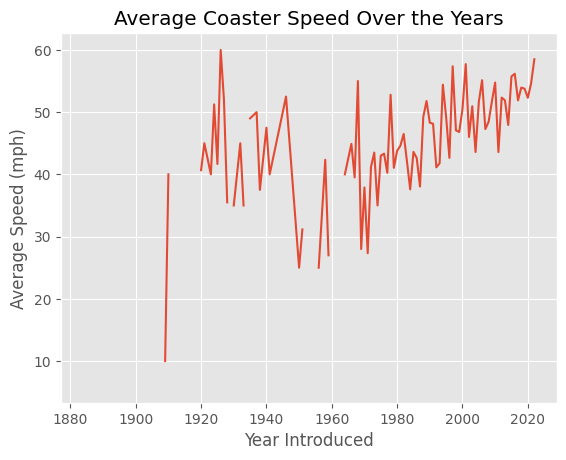

In [99]:
avg_speed_by_year = df.groupby('year_introduced')['speed_mph'].mean()
avg_speed_by_year.plot(kind='line', title='Average Coaster Speed Over the Years')
plt.xlabel('Year Introduced')
plt.ylabel('Average Speed (mph)')
plt.show()



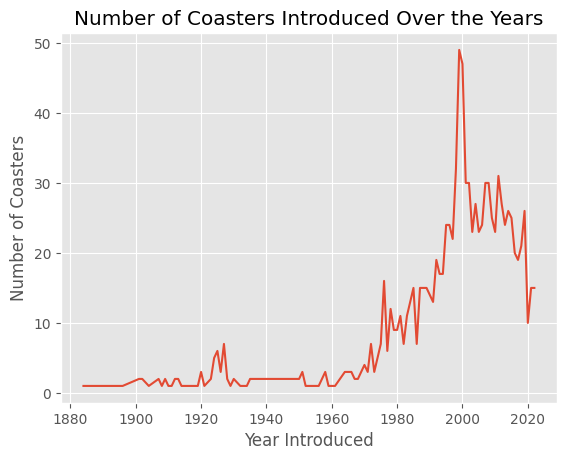

In [97]:
coaster_count_by_year = df['year_introduced'].value_counts().sort_index()
coaster_count_by_year.plot(kind='line', title='Number of Coasters Introduced Over the Years')
plt.xlabel('Year Introduced')
plt.ylabel('Number of Coasters')
plt.show()
